---------------

**If any part of this notebook is used in your research, please cite with the reference found in** **[README.md](https://github.com/pysal/spaghetti#bibtex-citation).**


----------------
## Caveats
### Demonstrating known caveats in `spaghetti`

**Author: James D. Gaboardi** **<jgaboardi@gmail.com>**

**This notebook demonstrates the following limitations and caveats:**

1. Limitations in non-planarity
2. Distance matrices between (dis)connected components
3. zzzz

In [1]:
%load_ext watermark
%watermark

2020-03-09T21:52:08-04:00

CPython 3.7.3
IPython 7.10.2

compiler   : Clang 9.0.0 (tags/RELEASE_900/final)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [26]:
import geopandas
import libpysal
from libpysal.cg import Point, Chain
import matplotlib
import matplotlib.pyplot as plt
import numpy
import spaghetti
%matplotlib inline
%watermark -w
%watermark -iv

watermark 2.0.2
matplotlib 3.1.2
spaghetti  1.4.2.post2
numpy      1.17.3
libpysal   4.2.0
geopandas  0.6.2



In [3]:
try:
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats("retina")
except ImportError:
    pass

-----------------------
### 1. Limitations in non-planarity
#### sub-info

In [13]:
U = [Chain([Point((2,2)), Point((2,1)), Point((4,1)), Point((4,2))])]
I = [Chain([Point((3,0)), Point((3,1))])]
arcs = U + I
arcs

In [5]:
ntw = spaghetti.Network(in_data=arcs)

/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: (4, 5).
  warnings.warn(message)
/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There are 2 islands with ids: (0, 3), (4, 5).
  warnings.warn(message)


In [6]:
ntw.network_n_components

2

In [12]:
ntw.network_component_vertices

{0: [0, 1, 2, 3], 1: [4, 5]}

In [7]:
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

### ... label vertices AND arcs with component ID

In [22]:
def arc_labels(a, b, s):
    """Label each leg of the tour."""
    def _lab_loc(_x):
        """Helper for labeling location."""
        return _x.geometry.interpolate(0.5, normalized=True).coords[0]
    kws = {"size": s, "ha": "center", "va": "bottom"}
    a.apply(lambda x: b.annotate(s=x.id, xy=_lab_loc(x), **kws), axis=1)

def vert_labels(v, b, s):
    """Label each point pattern observation."""
    def _lab_loc(_x):
        """Helper for labeling observations."""
        return _x.geometry.coords[0]
    kws = {"size": s, "ha": "left", "va": "bottom", "weight": "bold"}
    v.apply(lambda x: b.annotate(s=x.comp_label, xy=_lab_loc(x), **kws), axis=1)       

In [23]:
vertices_df

,id,geometry,comp_label
0,0,POINT (2.00000 2.00000),0
1,1,POINT (2.00000 1.00000),0
2,2,POINT (4.00000 1.00000),0
3,3,POINT (4.00000 2.00000),0
4,4,POINT (3.00000 0.00000),1
5,5,POINT (3.00000 1.00000),1


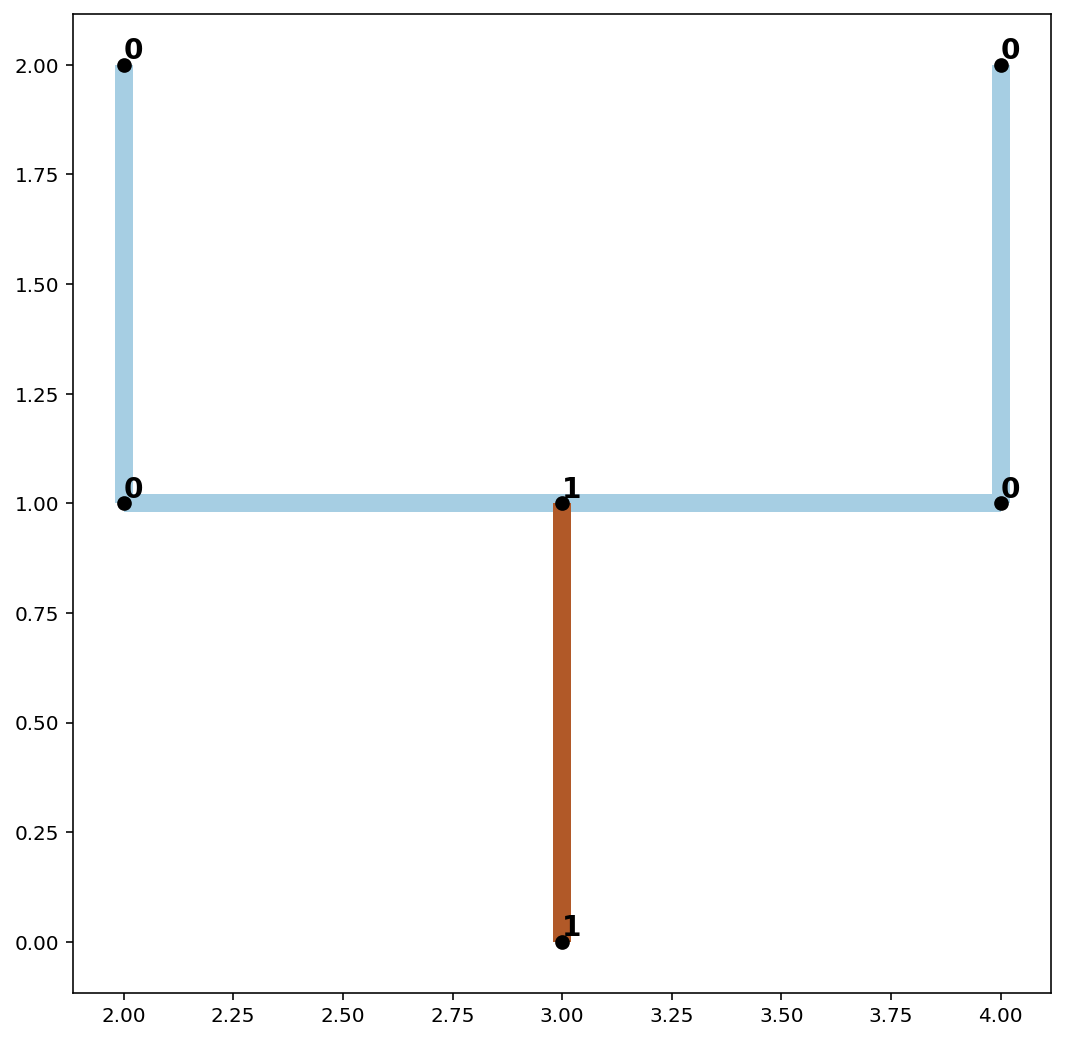

In [26]:
base = arcs_df.plot(column="comp_label", lw=9, cmap="Paired", figsize=(9, 9))
vertices_df.plot(ax=base, color="k", markersize=40, zorder=2)
# vertex labels
vert_labels(vertices_df, base, 14)

#### Flow from one network segment to another is only possible when segments share a vertex. In this case, no vertex is shared. The following plot visualoi

-----------------------
### 2. Info...
#### sub-info

-----------------------
### 3. Info...
#### sub-info

In [50]:
def _x(idx):
    return r*numpy.cos((idx*2*numpy.pi)/npts)+origin[0]
def _y(idx):
    return r*numpy.sin((idx*2*numpy.pi)/npts)+origin[1]

In [57]:
r = 1
npts = 64
origin = (5,5)

In [58]:
points = [Point((_x(i), _y(i))) for i in range(npts)]
lines = [Chain(points+[points[0]])]

In [59]:
points_gdf = geopandas.GeoDataFrame(geometry=points)
lines_gdf = geopandas.GeoDataFrame(geometry=lines)

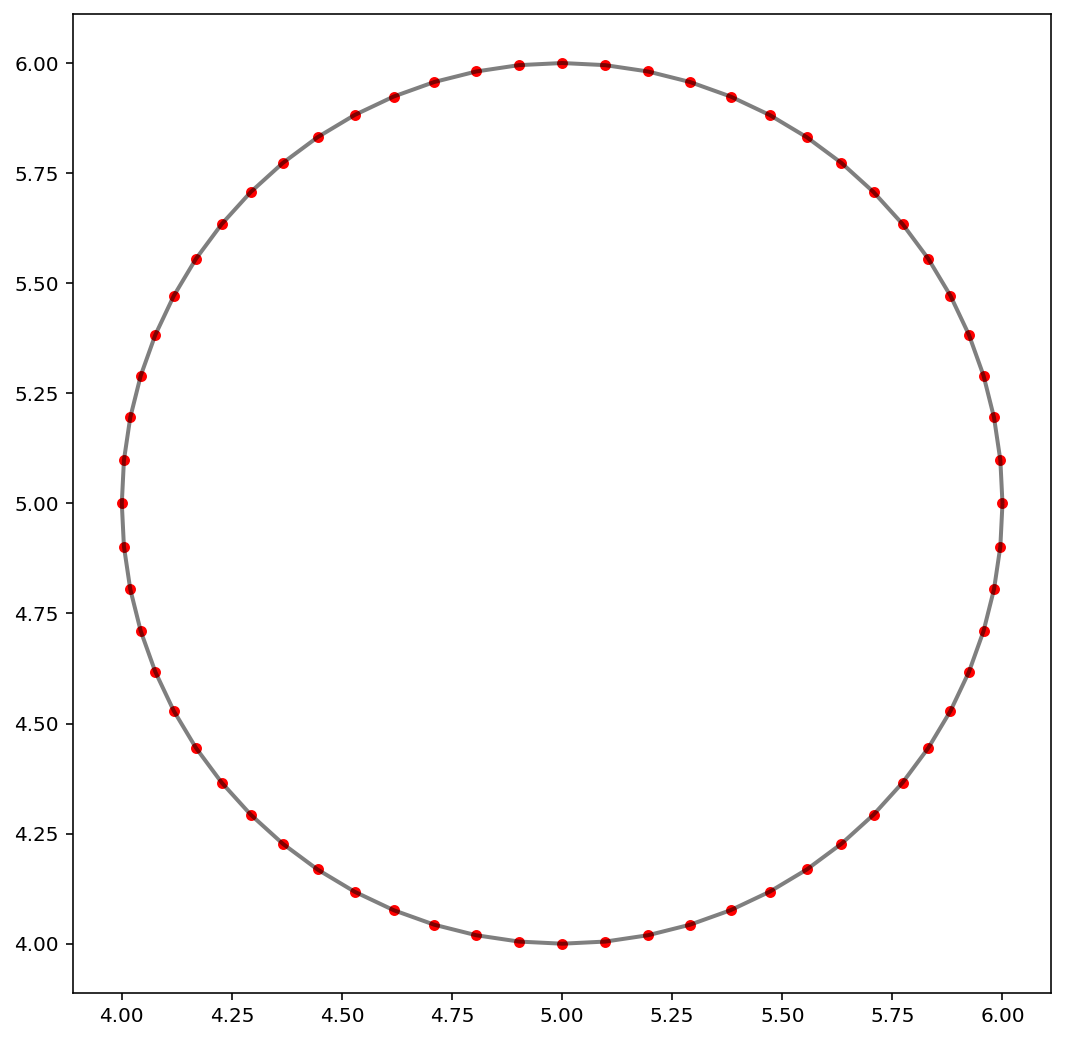

In [60]:
base = lines_gdf.plot(figsize=(9,9), color="k", alpha=.5, lw=2)
points_gdf.plot(ax=base, markersize=20, color="r")

In [61]:
lines += [Chain([Point((0,5)), Point((4,5))])]
lines_gdf = geopandas.GeoDataFrame(geometry=lines)

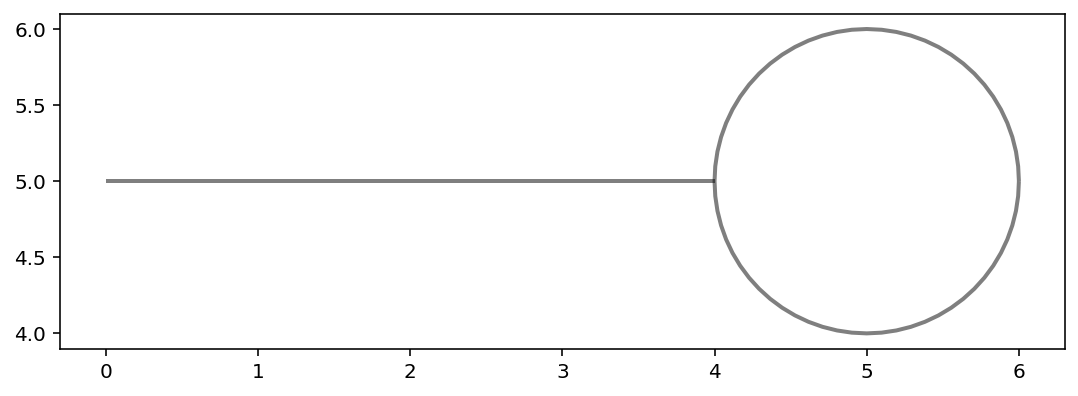

In [63]:
lines_gdf.plot(figsize=(9,9), color="k", alpha=.5, lw=2)

In [66]:
ntw = spaghetti.Network(in_data=lines_gdf, extractgraph=True)

In [71]:
ntw.network_component2arc

{0: [(0, 1),
  (0, 63),
  (1, 2),
  (2, 3),
  (3, 4),
  (4, 5),
  (5, 6),
  (6, 7),
  (7, 8),
  (8, 9),
  (9, 10),
  (10, 11),
  (11, 12),
  (12, 13),
  (13, 14),
  (14, 15),
  (15, 16),
  (16, 17),
  (17, 18),
  (18, 19),
  (19, 20),
  (20, 21),
  (21, 22),
  (22, 23),
  (23, 24),
  (24, 25),
  (25, 26),
  (26, 27),
  (27, 28),
  (28, 29),
  (29, 30),
  (30, 31),
  (31, 32),
  (32, 33),
  (32, 64),
  (33, 34),
  (34, 35),
  (35, 36),
  (36, 37),
  (37, 38),
  (38, 39),
  (39, 40),
  (40, 41),
  (41, 42),
  (42, 43),
  (43, 44),
  (44, 45),
  (45, 46),
  (46, 47),
  (47, 48),
  (48, 49),
  (49, 50),
  (50, 51),
  (51, 52),
  (52, 53),
  (53, 54),
  (54, 55),
  (55, 56),
  (56, 57),
  (57, 58),
  (58, 59),
  (59, 60),
  (60, 61),
  (61, 62),
  (62, 63)]}

In [69]:
ntw.graph_component2edge

{0: [(32, 32), (32, 64)]}

In [70]:
ntw.edges

[(32, 32), (32, 64)]

In [72]:
print(dir(ntw))

['NetworkF', 'NetworkG', 'NetworkK', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_evaluate_napts', '_extractnetwork', '_newpoint_coords', '_round_sig', '_snap_to_link', '_yield_napts', '_yieldneighbor', 'adjacencylist', 'allneighbordistances', 'arc_lengths', 'arcs', 'arcs_to_edges', 'compute_distance_to_vertices', 'compute_snap_dist', 'contiguityweights', 'count_per_link', 'distancebandweights', 'edge_lengths', 'edges', 'enum_links_vertex', 'extractgraph', 'full_distance_matrix', 'graph_component2edge', 'graph_component_is_ring', 'graph_component_labels', 'graph_component_lengths', 'graph_component_vertex_count', 'graph_component_vertices', 'graph_fully_connected', 'graph_largest_component'

In [74]:
print(dir(ntw.w_network))

['_W__get_id_order', '_W__neighbors_0', '_W__set_id_order', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_build_sparse', '_cache', '_cardinalities', '_component_labels', '_id2i', '_id_order', '_id_order_set', '_n', '_n_components', '_reset', '_sparse', '_transform', 'asymmetries', 'asymmetry', 'cardinalities', 'component_labels', 'diagW2', 'diagWtW', 'diagWtW_WW', 'from_WSP', 'from_adjlist', 'from_file', 'from_networkx', 'from_shapefile', 'full', 'get_transform', 'histogram', 'id2i', 'id_order', 'id_order_set', 'islands', 'max_neighbors', 'mean_neighbors', 'min_neighbors', 'n', 'n_components', 'neighbor_offsets', 'neighbors', 'nonzero', 'pct_nonzero', 'plot', 'rema

In [76]:
ntw.w_graph.neighbors

OrderedDict([((32, 32), [(32, 64)]), ((32, 64), [(32, 32)])])

In [80]:
arc2degree = {}
for i in ntw.w_network.neighbors:
    if i in arc2degree.keys():
        continue
    (v1, v2), neighs = i, ntw.w_network.neighbors[i]
    vertex2degree

In [81]:
v1

62

In [75]:
ntw.w_network.neighbors

OrderedDict([((0, 1), [(0, 63), (1, 2)]),
             ((0, 63), [(0, 1), (62, 63)]),
             ((1, 2), [(0, 1), (2, 3)]),
             ((2, 3), [(1, 2), (3, 4)]),
             ((3, 4), [(2, 3), (4, 5)]),
             ((4, 5), [(3, 4), (5, 6)]),
             ((5, 6), [(4, 5), (6, 7)]),
             ((6, 7), [(5, 6), (7, 8)]),
             ((7, 8), [(6, 7), (8, 9)]),
             ((8, 9), [(7, 8), (9, 10)]),
             ((9, 10), [(8, 9), (10, 11)]),
             ((10, 11), [(9, 10), (11, 12)]),
             ((11, 12), [(10, 11), (12, 13)]),
             ((12, 13), [(11, 12), (13, 14)]),
             ((13, 14), [(12, 13), (14, 15)]),
             ((14, 15), [(13, 14), (15, 16)]),
             ((15, 16), [(14, 15), (16, 17)]),
             ((16, 17), [(15, 16), (17, 18)]),
             ((17, 18), [(16, 17), (18, 19)]),
             ((18, 19), [(17, 18), (19, 20)]),
             ((19, 20), [(18, 19), (20, 21)]),
             ((20, 21), [(19, 20), (21, 22)]),
             ((21, 22), [

--------------------